In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [20]:
aml_df = pd.read_csv('../data_files/mbase_normed/aml.meta.mbase_norm.csv', index_col=0)
cml_df = pd.read_csv('../data_files/mbase_normed/cml.meta.mbase_norm.csv', index_col=0)
dengue_df = pd.read_csv('../data_files/mbase_normed/dengue.meta.mbase_norm.csv', index_col=0)
sepsis_df = pd.read_csv('../data_files/mbase_normed/sepsis.meta.mbase_norm.csv', index_col=0)
big_control_df = pd.read_csv('../data_files/mbase_normed/big_control.meta.mbase_norm.filter.csv', index_col=0)

In [21]:
master_df = aml_df.append([cml_df,dengue_df,sepsis_df, big_control_df])

In [22]:
master_df.shape

(10463, 93)

In [23]:
master_df.columns

Index(['Assay_Type', 'AssemblyName', 'AvgSpotLen', 'BioProject', 'BioSample',
       'Center_Name', 'Consent', 'DATASTORE_filetype', 'DATASTORE_provider',
       'Experiment', 'InsertSize', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Library_Name', 'LoadDate',
       'MBases', 'MBytes', 'Organism', 'Platform', 'ReleaseDate', 'SRA_Sample',
       'SRA_Study', 'Sample_Name', 'age', 'aki', 'alignment_count',
       'alpha_dup_count', 'alpha_dup_read_covers_snps_count',
       'alpha_dup_read_covers_snps_count_exact', 'alpha_dup_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_wt_count', 'alpha_wt_zero_edit_count', 'barcode', 'beta_count',
       'beta_read_covers_snps_count', 'beta_read_covers_snps_count_exact',
       'beta_zero_edit_count', 'cardiovascular_failure', 'cell_line',
       'cell_subtype', 'cell_subtype_surface_markers', 'cell_type',
       'cellcount', 'celltype', 'coagulation_failur

In [24]:
master_df.describe()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,alpha_read_covers_snps_count,...,norm_alpha_dup_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_alpha_wt_count,norm_beta_count,norm_beta_read_covers_snps_count_exact,organ_failure_count,sirs_signs,virus,virus_qpcr
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,...,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,83.000000,83.000000,0.0,0.0
mean,136.337666,6.928128,3268.840581,1903.260250,635.456083,241.140877,5.850330,4.703431,179.144127,7.848514,...,0.058730,0.001062,0.000800,0.055946,0.033351,0.001861,1.168675,1.373494,NaN,NaN
std,67.631447,41.917934,3993.126596,2369.046971,4468.055735,2258.524732,92.421525,77.470897,1881.475544,54.253133,...,0.644458,0.016466,0.006614,0.479409,0.163547,0.012559,1.463535,1.133856,NaN,NaN
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,63.000000,0.000000,116.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,150.000000,0.000000,2157.000000,1317.000000,12.000000,3.000000,0.000000,0.000000,2.000000,0.000000,...,0.000842,0.000000,0.000000,0.000837,0.001180,0.000000,0.000000,1.000000,NaN,NaN
75%,200.000000,0.000000,4919.500000,2969.000000,82.000000,18.000000,0.000000,0.000000,11.000000,0.000000,...,0.005583,0.000000,0.000000,0.005916,0.007690,0.000000,2.000000,2.000000,NaN,NaN
max,1344.000000,521.000000,53691.000000,35145.000000,173788.000000,90119.000000,4060.000000,3477.000000,78456.000000,1916.000000,...,33.586983,0.389690,0.250631,15.087212,3.731359,0.459865,5.000000,4.000000,NaN,NaN


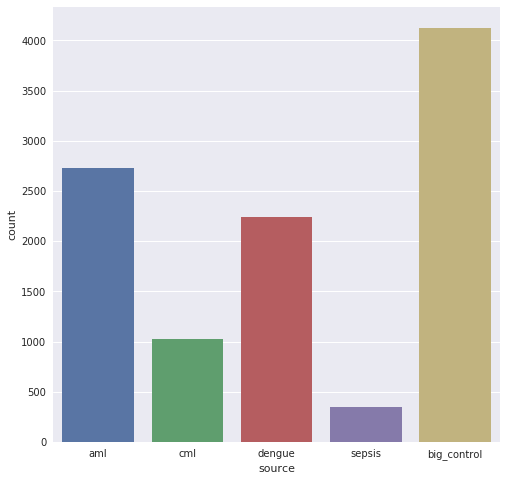

In [25]:
#How many of each type do we have?
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='source', data=master_df)

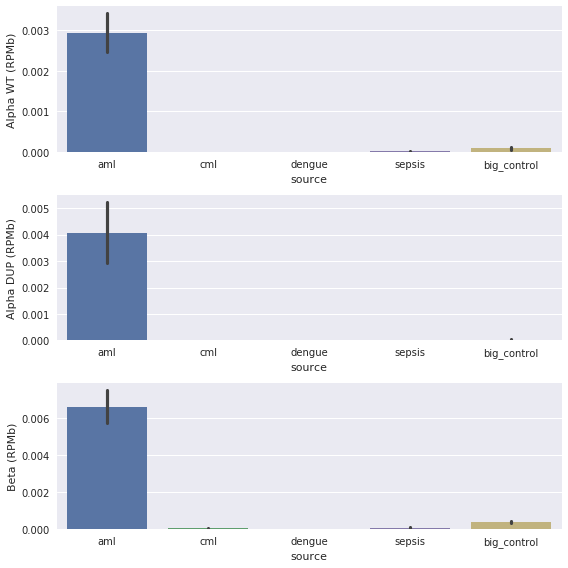

In [28]:
#What are the expression levels of each type?
fig, ax = plt.subplots(3,1,figsize=(8,8))
sns.barplot(x='source', y='norm_alpha_read_covers_snps_count_exact', data=master_df, ax=ax[0])
sns.barplot(x='source', y='norm_alpha_dup_read_covers_snps_count_exact', data=master_df, ax=ax[1])
sns.barplot(x='source', y='norm_beta_read_covers_snps_count_exact', data=master_df, ax=ax[2])

ax[0].set_ylabel('Alpha WT (RPMb)')
ax[1].set_ylabel('Alpha DUP (RPMb)')
ax[2].set_ylabel('Beta (RPMb)')
plt.tight_layout()

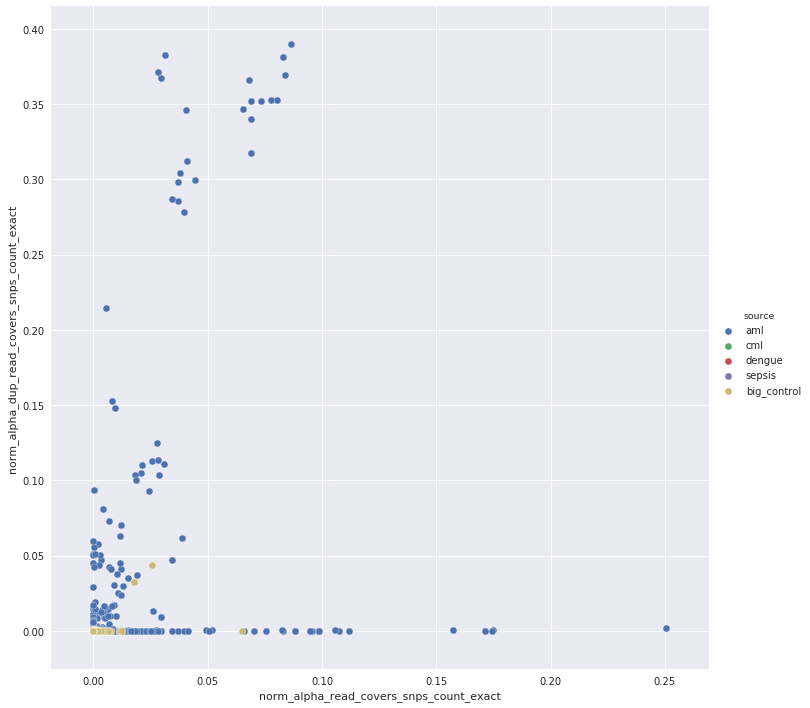

In [27]:
plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=master_df, hue="source", size=10)

axes = plot.axes
